# 作業重點:
(1)以Adam, 為例, 調整 batch_size, epoch , 觀察accurancy, loss 的變化

(2)以同一模型, 分別驗證 SGD, Adam, Rmsprop 的 accurancy

# 作業目標:
取得各種優化器的運算結果

# (1)以Adam, 為例, 調整 batch_size, epoch , 觀察accurancy, loss 的變化

In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
from keras import optimizers

Using TensorFlow backend.


In [0]:
#Blas GEMM launch failed , 避免動態分配GPU / CPU, 出現問題
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [0]:
'''
   宣告並設定
   batch_size：對總的樣本數進行分組，每組包含的樣本數量
   epochs ：訓練次數
   
''' 

batch_size = 64  #範例是32，建議用2的冪次方，此改為64
num_classes = 10
epochs = 15      #範例是20，此改為15
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [4]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [5]:
# 第一步：選擇模型, 順序模型是多個網絡層的線性堆疊
 
model = Sequential()

# 第二步：構建網絡層
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense( 10)) # 輸出結果是10個類別，所以維度是10   
model.add(Activation('softmax')) # 最後一層用softmax作為激活函數

W0804 16:24:48.506862 139810262484864 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0804 16:24:48.509993 139810262484864 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0804 16:24:48.514156 139810262484864 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0804 16:24:48.542937 139810262484864 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0804 16:24:48.545359 139810262484864 deprecation_wrapp

In [6]:
# 模型建立完成後，統計參數總量
print("Total Parameters：%d" % model.count_params())

Total Parameters：1250858


In [7]:
# 輸出模型摘要資訊
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
__________

In [8]:
#第三步編譯
 '''
 SGD(隨機梯度下降) - Arguments
lr: float >= 0. Learning rate.
momentum: float >= 0. Parameter that accelerates SGD in the relevant direction and dampens oscillations.
decay: float >= 0. Learning rate decay over each update.
nesterov: boolean. Whether to apply Nesterov momentum.
'''

'''
RMSprop- Arguments
lr: float >= 0. Learning rate.
rho: float >= 0.
epsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().
decay: float >= 0. Learning rate decay over each update.
'''

'''
Example:
opt = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

'''
opt = optimizers.Adam(lr=0.01,epsilon=None, decay=0.0)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

W0804 16:24:52.707711 139810262484864 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0804 16:24:52.716491 139810262484864 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
# 資料正規化
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [10]:
# 是否要做資料處理
if not data_augmentation:
    print('Not using data augmentation.')
    history=model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    print('')
        
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)
    history=model.fit(x_train, y_train,
              batch_size=batch_size, #對總的樣本數進行分組，每組包含的樣本數量
              epochs=epochs,         #訓練次數
              validation_data=(x_test, y_test), #拿出百分之多少用來做交叉驗證
              shuffle=True)          #是否把數據隨機打亂之後再進行訓練
    #verbose：屏顯模式 - 0：不輸出, 1：輸出進度, 2：輸出每次的訓練結果


Using real-time data augmentation.



W0804 16:24:58.534962 139810262484864 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 10s 209us/step - loss: 2.3059 - acc: 0.0991 - val_loss: 2.3032 - val_acc: 0.1000
Epoch 2/15
50000/50000 [==============================] - 8s 151us/step - loss: 2.3036 - acc: 0.0993 - val_loss: 2.3030 - val_acc: 0.1000
Epoch 3/15
50000/50000 [==============================] - 7s 149us/step - loss: 2.3036 - acc: 0.0992 - val_loss: 2.3035 - val_acc: 0.1000
Epoch 4/15
50000/50000 [==============================] - 7s 149us/step - loss: 2.3036 - acc: 0.0999 - val_loss: 2.3034 - val_acc: 0.1000
Epoch 5/15
50000/50000 [==============================] - 7s 149us/step - loss: 2.3035 - acc: 0.0997 - val_loss: 2.3038 - val_acc: 0.1000
Epoch 6/15
50000/50000 [==============================] - 7s 149us/step - loss: 2.3036 - acc: 0.1006 - val_loss: 2.3033 - val_acc: 0.1000
Epoch 7/15
50000/50000 [==============================] - 7s 149us/step - loss: 2.3035 - acc: 0.0981 - val_loss: 2.3041 -

In [11]:
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Saved trained model at /content/saved_models/keras_cifar10_trained_model.h5 
10000/10000 [==============================] - 1s 93us/step
Test loss: 2.3033124794006348
Test accuracy: 0.1


In [12]:
#    第六步：輸出
import numpy 

print ( " test set " )
scores = model.evaluate(x_test,y_test,batch_size=200,verbose= 0)
print ( "" )
#print ( " The test loss is %f " % scores)
print ( " The test loss is %f ", scores)


result = model.predict(x_test,batch_size=200,verbose= 0)

result_max = numpy.argmax(result, axis = 1 )
test_max = numpy.argmax(y_test, axis = 1 )

result_bool = numpy.equal(result_max, test_max)
true_num = numpy.sum(result_bool)

 test set 

 The test loss is %f  [2.303312497138977, 0.09999999970197677]


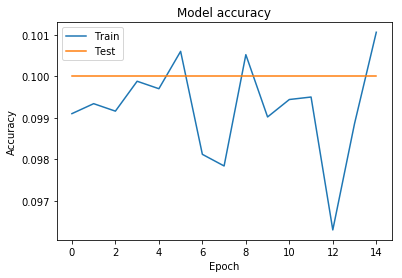

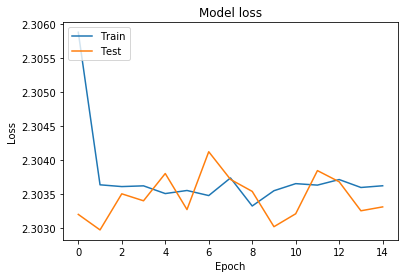

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# (2)以同一模型, 分別驗證 SGD, Adam, Rmsprop 的 accurancy

# SGD

In [0]:
# 第三步：編譯, 
opt= 'SGD'
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [15]:
history=model.fit(x_train, 
                  y_train,
                  batch_size=batch_size, #對總的樣本數進行分組，每組包含的樣本數量
                  epochs=epochs,         #訓練次數
                  validation_data=(x_test, y_test), #拿出百分之多少用來做交叉驗證
                  shuffle=True) 

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 7s 144us/step - loss: 2.3030 - acc: 0.0992 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 2/15
50000/50000 [==============================] - 7s 132us/step - loss: 2.3027 - acc: 0.0976 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 3/15
50000/50000 [==============================] - 7s 131us/step - loss: 2.3027 - acc: 0.0969 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 4/15
50000/50000 [==============================] - 7s 132us/step - loss: 2.3027 - acc: 0.0976 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 5/15
50000/50000 [==============================] - 7s 132us/step - loss: 2.3027 - acc: 0.0976 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 6/15
50000/50000 [==============================] - 7s 132us/step - loss: 2.3027 - acc: 0.0969 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 7/15
50000/50000 [==============================] - 7s 132us/step - loss: 2.3027 - acc: 0.0982 - val_loss: 2.3026 - 

In [16]:
#    第六步：輸出
import numpy 

print ( " test set " )
scores = model.evaluate(x_test,y_test,batch_size=200,verbose= 0)
print ( "" )
print ( " The test loss is %f ", scores)

result = model.predict(x_test,batch_size=200,verbose= 0)

result_max = numpy.argmax(result, axis = 1 )
test_max = numpy.argmax(y_test, axis = 1 )

result_bool = numpy.equal(result_max, test_max)
true_num = numpy.sum(result_bool)
print ( "" )
print ( " The accuracy of the model is %f " % (true_num/len(result_bool)))

 test set 

 The test loss is %f  [2.302586040496826, 0.10000000029802322]

 The accuracy of the model is 0.100000 


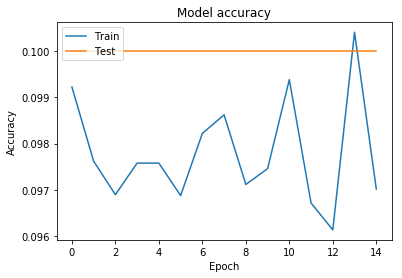

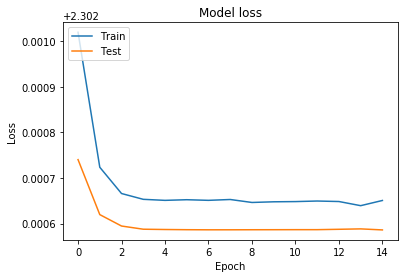

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Rmsprop

In [0]:
# 第三步：編譯, 
opt= 'RMSprop'
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [19]:
history=model.fit(x_train, 
                  y_train,
                  batch_size=batch_size, #對總的樣本數進行分組，每組包含的樣本數量
                  epochs=epochs,         #訓練次數
                  validation_data=(x_test, y_test), #拿出百分之多少用來做交叉驗證
                  shuffle=True) 

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 8s 152us/step - loss: 2.3027 - acc: 0.0976 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 2/15
50000/50000 [==============================] - 7s 142us/step - loss: 2.3027 - acc: 0.0975 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 3/15
50000/50000 [==============================] - 7s 142us/step - loss: 2.3027 - acc: 0.0989 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 4/15
50000/50000 [==============================] - 7s 142us/step - loss: 2.3027 - acc: 0.0994 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 5/15
50000/50000 [==============================] - 7s 142us/step - loss: 2.3027 - acc: 0.0969 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 6/15
50000/50000 [==============================] - 7s 141us/step - loss: 2.3027 - acc: 0.0994 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 7/15
50000/50000 [==============================] - 7s 145us/step - loss: 2.3028 - acc: 0.0954 - val_loss: 2.3026 - 

In [20]:
#    第六步：輸出
import numpy 

print ( " test set " )
scores = model.evaluate(x_test,y_test,batch_size=200,verbose= 0)
print ( "" )
print ( " The test loss is %f ", scores)

result = model.predict(x_test,batch_size=200,verbose= 0)

result_max = numpy.argmax(result, axis = 1 )
test_max = numpy.argmax(y_test, axis = 1 )

result_bool = numpy.equal(result_max, test_max)
true_num = numpy.sum(result_bool)
print ( "" )
print ( " The accuracy of the model is %f " % (true_num/len(result_bool)))

 test set 

 The test loss is %f  [2.3026053428649904, 0.10000000089406967]

 The accuracy of the model is 0.100000 


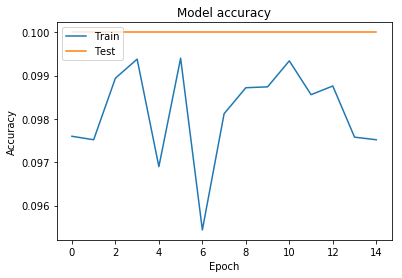

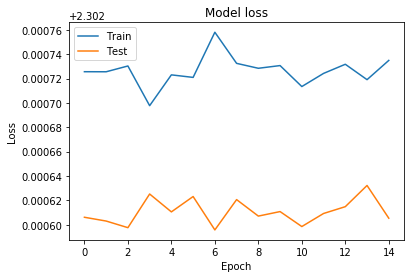

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 範例目標:
推導 優化器: Adam, 了解其原理與優化過程

# 範例重點:
提供 AdamOptimizer 的範例, 可以讓學員驗證 m, v與 β的變化關係

# 以下的片段範例需要有 ffmpeg
請務必使用 conda 指令安裝

務必確認HDD 有足夠的空間

conda install -c conda-forge ffmpeg

NOTE: 必須在執行此一範例前先行安裝

In [22]:
import sys
print(sys.version)

3.6.8 (default, Jan 14 2019, 11:02:34) 
[GCC 8.0.1 20180414 (experimental) [trunk revision 259383]]


In [0]:
#!pip install autograd
#!pip install IPython

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import autograd.numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML

from autograd import elementwise_grad,value_and_grad,grad
from scipy.optimize import minimize
from collections import defaultdict
from itertools import zip_longest

# Objective function: the Beale function

In [25]:
# Objective function: the Beale function

f  = lambda x, y: (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

xmin, xmax, xstep = -4.5, 4.5, .2
ymin, ymax, ystep = -4.5, 4.5, .2

x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))

z = f(x, y)
minima = np.array([3., .5])
f(*minima)

0.0

In [26]:
minima_ = minima.reshape(-1, 1)
minima_

f(*minima_)

array([0.])

In [0]:
def target_func(weights):
    x,y = weights
    return f(x,y)

# Adam Optimizer

In [0]:
class Adam:
    def __init__(self, loss, weights, lr=0.001, beta1=0.9, beta2=0.999, epislon=1e-8):
        self.loss = loss
        self.theta = weights
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.epislon = epislon
        self.get_gradient = grad(loss)
        self.m = 0
        self.v = 0
        self.t = 0

    def minimize_raw(self):
        self.t += 1
        g = self.get_gradient(self.theta)
        self.m = self.beta1 * self.m + (1 - self.beta1) * g
        self.v = self.beta2 * self.v + (1 - self.beta2) * (g * g)
        self.m_hat = self.m / (1 - self.beta1 ** self.t)
        self.v_hat = self.v / (1 - self.beta2 ** self.t)
        self.theta -= self.lr * self.m_cat / (self.v_cat ** 0.5 + self.epislon)

    def minimize(self):
        self.t += 1
        g = self.get_gradient(self.theta)
        lr = self.lr * (1 - self.beta2 ** self.t) ** 0.5 / (1 - self.beta1 ** self.t)
        self.m = self.beta1 * self.m + (1 - self.beta1) * g
        self.v = self.beta2 * self.v + (1 - self.beta2) * (g * g)
        self.theta -= lr * self.m / (self.v ** 0.5 + self.epislon)

    def minimize_trace(self, path=[]):
        self.t += 1
        g = self.get_gradient(self.theta)
        lr = self.lr * (1 - self.beta2 ** self.t) ** 0.5 / (1 - self.beta1 ** self.t)
        self.m = self.beta1 * self.m + (1 - self.beta1) * g
        self.v = self.beta2 * self.v + (1 - self.beta2) * (g * g)
        self.theta -= lr * self.m / (self.v ** 0.5 + self.epislon)
        path.append(np.copy(self.theta))

In [29]:
EPOCHS = 3000
SHOW_STEPS = 100
PRECISION = 1e-8
weights = np.array([1., 1.5])
path_trace = [np.copy(weights)]
adam = Adam(target_func, weights, lr=0.01)
print("start to optimize EPOCHS:{}".format(EPOCHS))
progress_step = EPOCHS // SHOW_STEPS

for i in range(EPOCHS):
    if i % progress_step == 0:
        loss_value = adam.loss(adam.theta)
        print("times:{} weights:{} loss:{}".format(i, adam.theta, loss_value))
        if loss_value < PRECISION:
            print("loss:{} is less than precision:{}, finish!".format(loss_value, PRECISION))
            break
    adam.minimize_trace(path_trace)
print("\nfinal weights:{} loss:{}".format(adam.theta, adam.loss(adam.theta)))

start to optimize EPOCHS:3000
times:0 weights:[1.  1.5] loss:41.25
times:30 weights:[0.7371867  1.22939503] loss:20.299015115677488
times:60 weights:[0.60591868 1.04849877] loss:15.060862617226
times:90 weights:[0.58632034 0.91842752] loss:12.981397656153064
times:120 weights:[0.6502342  0.80472928] loss:11.321903656324578
times:150 weights:[0.78098643 0.69414189] loss:9.42760928272687
times:180 weights:[0.95890658 0.58512322] loss:7.2900861448751595
times:210 weights:[1.15977446 0.48274852] loss:5.207435732865861
times:240 weights:[1.36076875 0.39347367] loss:3.479710603481422
times:270 weights:[1.54570617 0.32136353] loss:2.228035884986305
times:300 weights:[1.70612102 0.26732981] loss:1.411090259141672
times:330 weights:[1.83962001 0.23008581] loss:0.9173472485588398
times:360 weights:[1.94767077 0.2072466 ] loss:0.6334829645634958
times:390 weights:[2.03377945 0.19605415] loss:0.47280443927631366
times:420 weights:[2.10220386 0.19378707] loss:0.3789137443501675
times:450 weights:[2

In [30]:
print("-------------")
path_trace = np.array(path_trace).T
shape = path_trace.shape
if shape[1] > SHOW_STEPS:
    show_step = shape[1] // SHOW_STEPS
    path_trace = np.array(path_trace[:,::show_step])
print(path_trace)

-------------
[[1.         0.7371867  0.60591868 0.58632034 0.6502342  0.78098643
  0.95890658 1.15977446 1.36076875 1.54570617 1.70612102 1.83962001
  1.94767077 2.03377945 2.10220386 2.15712666 2.20219283 2.24031854
  2.27368033 2.30380576 2.33170617 2.3580134  2.38309961 2.40717167
  2.43033926 2.45266007 2.47416728 2.49488466 2.51483386 2.53403729
  2.55251875 2.57030322 2.5874163  2.60388375 2.61973105 2.63498313
  2.64966421 2.66379762 2.67740575 2.69051    2.70313081 2.7152876
  2.72699887 2.73828215 2.74915411 2.75963055 2.76972647 2.77945612
  2.78883299 2.79786993 2.80657914 2.81497221 2.82306018 2.83085356
  2.83836237 2.84559617 2.85256409 2.85927487 2.86573685 2.87195804
  2.87794611 2.88370843 2.88925209 2.8945839  2.89971044 2.90463802
  2.90937277 2.9139206  2.91828721 2.92247816 2.92649882 2.93035439
  2.93404994 2.93759039 2.94098055 2.94422508 2.94732853 2.95029536
  2.95312989 2.95583637 2.95841894 2.96088166 2.96322849 2.96546332
  2.96758996 2.96961214 2.9715335  

# Visualize Convergence Trace

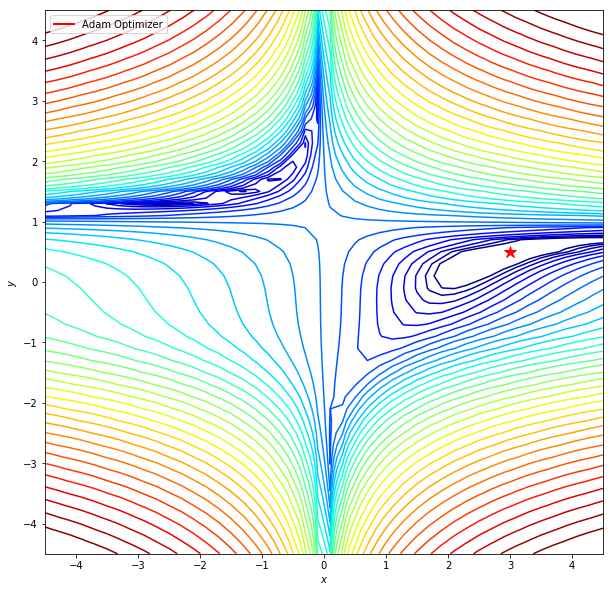

In [31]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.plot(*minima_, 'r*', markersize=12)

line, = ax.plot([], [], 'r', label='Adam Optimizer', lw=2)
point, = ax.plot([], [], 'ro')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

ax.legend(loc='upper left')

In [32]:
import matplotlib.animation as manimation; manimation.writers.list()

def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point

def animate(i):
    line.set_data(*path_trace[::,:i])
    point.set_data(*path_trace[::,i-1:i])
    return line, point

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=path_trace.shape[1], interval=60, 
                               repeat_delay=5, blit=True)
HTML(anim.to_html5_video())

# 課程重點:
利用Keras 建立神經網路模型

查看優化器的結果
# 範例目標:  
使用CIFAR-10圖庫, 看看完整神經網路

In [0]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

In [0]:
#Blas GEMM launch failed , 避免動態分配GPU / CPU, 出現問題
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [0]:
batch_size = 32
num_classes = 10
epochs = 20
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [36]:
# 檢查Dataset 的描述與資訊
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
# 第一步：選擇模型, 順序模型是多個網絡層的線性堆疊
 
model = Sequential()

# 第二步：構建網絡層
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense( 10)) # 輸出結果是10個類別，所以維度是10   
model.add(Activation('softmax')) # 最後一層用softmax作為激活函數

In [38]:
# 模型建立完成後，統計參數總量
print("Total Parameters：%d" % model.count_params())

Total Parameters：1250858


In [39]:
# 輸出模型摘要資訊
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 64)        18496     
__________

In [40]:
#第三步編譯
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# 資料正規化
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

W0804 15:28:14.265827 140074362378112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0804 15:28:14.292357 140074362378112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [41]:
# 是否要做資料處理
if not data_augmentation:
    print('Not using data augmentation.')
    history=model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    print('')
        
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)
    history=model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)   

'''
   第四步：訓練
   .fit的一些參數
   batch_size：對總的樣本數進行分組，每組包含的樣本數量
   epochs ：訓練次數
   shuffle：是否把數據隨機打亂之後再進行訓練
   validation_split：拿出百分之多少用來做交叉驗證
   verbose：屏顯模式 - 0：不輸出, 1：輸出進度, 2：輸出每次的訓練結果
''' 

Using real-time data augmentation.



W0804 15:28:16.931529 140074362378112 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 16s 329us/step - loss: 1.5108 - acc: 0.4521 - val_loss: 1.1779 - val_acc: 0.5810
Epoch 2/20
50000/50000 [==============================] - 11s 226us/step - loss: 1.1083 - acc: 0.6089 - val_loss: 0.9143 - val_acc: 0.6809
Epoch 3/20
50000/50000 [==============================] - 11s 224us/step - loss: 0.9526 - acc: 0.6651 - val_loss: 0.9146 - val_acc: 0.6767
Epoch 4/20
50000/50000 [==============================] - 11s 224us/step - loss: 0.8637 - acc: 0.6990 - val_loss: 0.7803 - val_acc: 0.7316
Epoch 5/20
50000/50000 [==============================] - 11s 224us/step - loss: 0.8037 - acc: 0.7173 - val_loss: 0.7179 - val_acc: 0.7491
Epoch 6/20
50000/50000 [==============================] - 11s 224us/step - loss: 0.7528 - acc: 0.7357 - val_loss: 0.7117 - val_acc: 0.7556
Epoch 7/20
50000/50000 [==============================] - 11s 224us/step - loss: 0.7210 - acc: 0.7454 - val_loss: 0.

'\n   第四步：訓練\n   .fit的一些參數\n   batch_size：對總的樣本數進行分組，每組包含的樣本數量\n   epochs ：訓練次數\n   shuffle：是否把數據隨機打亂之後再進行訓練\n   validation_split：拿出百分之多少用來做交叉驗證\n   verbose：屏顯模式 - 0：不輸出, 1：輸出進度, 2：輸出每次的訓練結果\n'

In [42]:
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

#    第六步：輸出
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Saved trained model at /content/saved_models/keras_cifar10_trained_model.h5 
10000/10000 [==============================] - 1s 91us/step
Test loss: 0.6399392299652099
Test accuracy: 0.7916


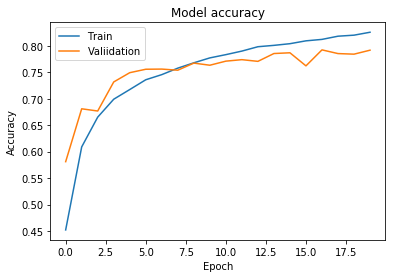

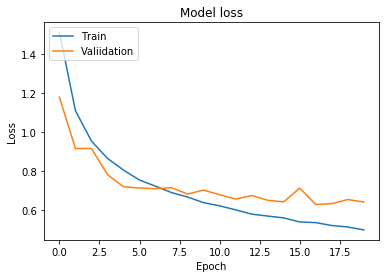

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valiidation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valiidation'], loc='upper left')
plt.show()

參考資料

1. [An overview of gradient descent optimization algorithms](https://arxiv.org/pdf/1609.04747.pdf)  
2. 在很多機器學習和深度學習的應用中，我們發現用的最多的優化器是Adam，為什麼呢？請參考連結：[TensorFlow中的優化器](https://www.tensorflow.org/api_docs/python/tf/train)  
3. 在keras中也有SGD，RMSprop，Adagrad，Adadelta，Adam等：https://keras.io/optimizers/  
4. 我們可以發現除了常見的梯度下降，還有Adadelta，Adagrad，RMSProp 等幾種優化器，都是什麼呢，又該怎麼選擇呢? https://blog.csdn.net/qq_35860352/article/details/80772142   
5. 提供 AdamOptimizer 的範例, 可以讓學員驗證 m, v與  β的變化關係，請參考範例程式碼D76-Optimizers_進階